In [207]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np


csv_file_path = '../data/BDI3 All Evals for NSS 11-2023.csv'

data_csv = pd.read_csv(csv_file_path)

data_csv.head()

C:\Users\iliss\AppData\Local\Temp\ipykernel_4044\4048047921.py:9: DtypeWarning: Columns (0,43) have mixed types. Specify dtype option on import or set low_memory=False.
  data_csv = pd.read_csv(csv_file_path)


,Child ID,Gender,Date of Birth,Location - Sub Level 1,Program Label,Adaptive Sum of Scaled Scores,Adaptive Developmental Quotient,Adaptive Percentile Rank,Adaptive 95% Confidence Interval,Adaptive RDI,...,Code 1,Code 2,Code 3,Code 4,Code 5,Code 6,Code 7,Code 8,Code 9,Code 10
0,44879,F,9/27/2022,Southwest,BDI-3 Eligibility Evaluation,7.0,85.0,16,77-97,39/90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,47795,F,12/23/2020,Greater Nashville,BDI-3 Eligibility Evaluation,16.0,88.0,21,82-96,79/90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,54340,M,6/22/2021,First Tennessee,BDI-3 Eligibility Evaluation,8.0,90.0,25,81-101,77/90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,54344,F,3/7/2022,Southeast Tennessee,BDI-3 Eligibility Evaluation,13.0,115.0,84,103-123,99/90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,54515,M,11/4/2021,Memphis Delta,BDI-3 Eligibility Evaluation,5.0,75.0,5,68-88,Sep-90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [208]:
columns_to_drop = ['Code 1', 'Code 2', 'Code 3', 'Code 4', 'Code 5', 
                   'Code 6', 'Code 7', 'Code 8', 'Code 9', 'Code 10']

data_csv = data_csv.drop(columns=columns_to_drop)

# drop the empty columns

In [210]:
data_csv.columns = [c.replace(' ', '_') for c in data_csv.columns]

In [211]:
# 1. In which domains (and sub-domains) are children performing highest and lowest?

In [212]:
data_csv.columns.values.tolist()

['Child_ID',
 'Gender',
 'Date_of_Birth',
 'Location_-_Sub_Level_1',
 'Program_Label',
 'Adaptive_Sum_of_Scaled_Scores',
 'Adaptive_Developmental_Quotient',
 'Adaptive_Percentile_Rank',
 'Adaptive_95%_Confidence_Interval',
 'Adaptive_RDI',
 'Adaptive_Z-Score',
 'Adaptive_T-Score',
 'Adaptive_NCE',
 'Social-Emotional_Sum_of_Scaled_Scores',
 'Social-Emotional_Developmental_Quotient',
 'Social-Emotional_Percentile_Rank',
 'Social-Emotional_95%_Confidence_Interval',
 'Social-Emotional_RDI',
 'Social-Emotional_Z-Score',
 'Social-Emotional_T-Score',
 'Social-Emotional_NCE',
 'Communication_Sum_of_Scaled_Scores',
 'Communication_Developmental_Quotient',
 'Communication_Percentile_Rank',
 'Communication_95%_Confidence_Interval',
 'Communication_RDI',
 'Communication_Z-Score',
 'Communication_T-Score',
 'Communication_NCE',
 'Motor_Sum_of_Scaled_Scores',
 'Motor_Developmental_Quotient',
 'Motor_Percentile_Rank',
 'Motor_95%_Confidence_Interval',
 'Motor_RDI',
 'Motor_Z-Score',
 'Motor_T-Score',

In [213]:
adaptive_domain = data_csv[[
    'Adaptive_Sum_of_Scaled_Scores','Adaptive_Developmental_Quotient',
 'Adaptive_Percentile_Rank',
 'Adaptive_95%_Confidence_Interval',
 'Adaptive_RDI',
 'Adaptive_Z-Score',
 'Adaptive_T-Score',
 'Adaptive_NCE',
 'Social-Emotional_Sum_of_Scaled_Scores',
 'Social-Emotional_Developmental_Quotient',
 'Social-Emotional_Percentile_Rank',
 'Social-Emotional_95%_Confidence_Interval',
 'Social-Emotional_RDI',
 'Social-Emotional_Z-Score',
 'Social-Emotional_T-Score',
 'Social-Emotional_NCE',
 'Communication_Sum_of_Scaled_Scores',
 'Communication_Developmental_Quotient',
 'Communication_Percentile_Rank',
 'Communication_95%_Confidence_Interval',
 'Communication_RDI',
 'Communication_Z-Score',
 'Communication_T-Score',
 'Communication_NCE',
 'Motor_Sum_of_Scaled_Scores',
 'Motor_Developmental_Quotient',
 'Motor_Percentile_Rank',
 'Motor_95%_Confidence_Interval',
 'Motor_RDI',
 'Motor_Z-Score',
 'Motor_T-Score',
 'Motor_NCE',
 'Cognitive_Sum_of_Scaled_Scores',
 'Cognitive_Developmental_Quotient',
 'Cognitive_Percentile_Rank',
 'Cognitive_95%_Confidence_Interval',
 'Cognitive_RDI',
 'Cognitive_Z-Score',
 'Cognitive_T-Score',
 'Cognitive_NCE',
 'BDI-3_Total_Sum_of_Scaled_Scores',
 'BDI-3_Total_Developmental_Quotient',
 'BDI-3_Total_Percentile_Rank',
 'BDI-3_Total_90%_Confidence_Interval',
 'BDI-3_Total_95%_Confidence_Interval',
 'BDI-3_Total_Z-Score',
 'BDI-3_Total_T-Score',
 'BDI-3_Total_NCE',
 'Adaptive-Self_Care_Date_of_Testing',
 'Adaptive-Self_Care_RS',
 'Adaptive-Self_Care_SS',
 'Adaptive-Self_Care_PR',
 'Adaptive-Self_Care_AE',
 'Adaptive-Self_Care_RDI',
 'Adaptive-Self_Care_CSS',
 'Adaptive-Self_Care_CSS_90%',
 'Adaptive-Self_Care_Z-Score',
 'Adaptive-Self_Care_T-Score',
 'Adaptive-Self_Care_NCE',
 'Adaptive-Personal_Responsibility_Date_of_Testing',
 'Adaptive-Personal_Responsibility_RS',
 'Adaptive-Personal_Responsibility_SS',
 'Adaptive-Personal_Responsibility_PR',
 'Adaptive-Personal_Responsibility_AE',
 'Adaptive-Personal_Responsibility_RDI',
 'Adaptive-Personal_Responsibility_CSS',
 'Adaptive-Personal_Responsibility_CSS_90%',
 'Adaptive-Personal_Responsibility_Z-Score',
 'Adaptive-Personal_Responsibility_T-Score',
 'Adaptive-Personal_Responsibility_NCE',
 'Social_Emotional-Adult_Interaction_Date_of_Testing',
 'Social_Emotional-Adult_Interaction_RS',
 'Social_Emotional-Adult_Interaction_SS',
 'Social_Emotional-Adult_Interaction_PR',
 'Social_Emotional-Adult_Interaction_AE',
 'Social_Emotional-Adult_Interaction_RDI',
 'Social_Emotional-Adult_Interaction_CSS',
 'Social_Emotional-Adult_Interaction_CSS_90%',
 'Social_Emotional-Adult_Interaction_Z-Score',
 'Social_Emotional-Adult_Interaction_T-Score',
 'Social_Emotional-Adult_Interaction_NCE',
 'Social_Emotional-Peer_Interaction_Date_of_Testing',
 'Social_Emotional-Peer_Interaction_RS',
 'Social_Emotional-Peer_Interaction_SS',
 'Social_Emotional-Peer_Interaction_PR',
 'Social_Emotional-Peer_Interaction_AE',
 'Social_Emotional-Peer_Interaction_RDI',
 'Social_Emotional-Peer_Interaction_CSS',
 'Social_Emotional-Peer_Interaction_CSS_90%',
 'Social_Emotional-Peer_Interaction_Z-Score',
 'Social_Emotional-Peer_Interaction_T-Score',
 'Social_Emotional-Peer_Interaction_NCE',
 'Social_Emotional-Self_Concept_/_Social_Role_Date_of_Testing',
 'Social_Emotional-Self_Concept_/_Social_Role_RS',
 'Social_Emotional-Self_Concept_/_Social_Role_SS',
 'Social_Emotional-Self_Concept_/_Social_Role_PR',
 'Social_Emotional-Self_Concept_/_Social_Role_AE',
 'Social_Emotional-Self_Concept_/_Social_Role_RDI',
 'Social_Emotional-Self_Concept_/_Social_Role_CSS',
 'Social_Emotional-Self_Concept_/_Social_Role_CSS_90%',
 'Social_Emotional-Self_Concept_/_Social_Role_Z-Score',
 'Social_Emotional-Self_Concept_/_Social_Role_T-Score',
 'Social_Emotional-Self_Concept_/_Social_Role_NCE',
 'Communication-Receptive_Communication_Date_of_Testing',
 'Communication-Receptive_Communication_RS',
 'Communication-Receptive_Communication_SS',
 'Communication-Receptive_Communication_PR',
 'Communication-Receptive_Communication_AE',
 'Communication-Receptive_Communication_RDI',
 'Communication-Receptive_Communication_CSS',
 'Communication-Receptive_Communication_CSS_90%_',
 'Communication-Receptive_Communication_Z-Score',
 'Communication-Receptive_Communication_T-Score',
 'Communication-Receptive_Communication_NCE',
 'Communication-Expressive_Communication_Date_of_Testing',
 'Communication-Expressive_Communication_RS',
 'Communication-Expressive_Communication_SS',
 'Communication-Expressive_Communication_PR',
 'Communication-Expressive_Communication_AE',
 'Communication-Expressive_Communication_RDI',
 'Communication-Expressive_Communication_CSS',
 'Communication-Expressive_Communication_CSS_90%_',
 'Communication-Expressive_Communication_Z-Score',
 'Communication-Expressive_Communication_T-Score',
 'Communication-Expressive_Communication_NCE',
 'Motor-Gross_Motor_Date_of_Testing',
 'Motor-Gross_Motor_RS',
 'Motor-Gross_Motor_SS',
 'Motor-Gross_Motor_PR',
 'Motor-Gross_Motor_AE',
 'Motor-Gross_Motor_RDI',
 'Motor-Gross_Motor_CSS',
 'Motor-Gross_Motor_CSS_90%_',
 'Motor-Gross_Motor_Z-Score',
 'Motor-Gross_Motor_T-Score',
 'Motor-Gross_Motor_NCE',
 'Motor-Fine_Motor_Date_of_Testing',
 'Motor-Fine_Motor_RS',
 'Motor-Fine_Motor_SS',
 'Motor-Fine_Motor_PR',
 'Motor-Fine_Motor_AE',
 'Motor-Fine_Motor_RDI',
 'Motor-Fine_Motor_CSS',
 'Motor-Fine_Motor_CSS_90%',
 'Motor-Fine_Motor_Z-Score',
 'Motor-Fine_Motor_T-Score',
 'Motor-Fine_Motor_NCE',
 'Motor-Perceptual_Motor_Date_of_Testing',
 'Motor-Perceptual_Motor_RS',
 'Motor-Perceptual_Motor_SS',
 'Motor-Perceptual_Motor_PR',
 'Motor-Perceptual_Motor_AE',
 'Motor-Perceptual_Motor_RDI',
 'Motor-Perceptual_Motor_CSS',
 'Motor-Perceptual_Motor_CSS_90%_',
 'Motor-Perceptual_Motor_Z-Score',
 'Motor-Perceptual_Motor_T-Score',
 'Motor-Perceptual_Motor_NCE',
 'Cognitive-Attention_and_Memory_Date_of_Testing',
 'Cognitive-Attention_and_Memory_RS',
 'Cognitive-Attention_and_Memory_SS',
 'Cognitive-Attention_and_Memory_PR',
 'Cognitive-Attention_and_Memory_AE',
 'Cognitive-Attention_and_Memory_RDI',
 'Cognitive-Attention_and_Memory_CSS',
 'Cognitive-Attention_and_Memory_CSS_90%',
 'Cognitive-Attention_and_Memory_Z-Score',
 'Cognitive-Attention_and_Memory_T-Score',
 'Cognitive-Attention_and_Memory_NCE',
 'Cognitive-Reasoning_/_Academic_Skills_Date_of_Testing',
 'Cognitive-Reasoning_/_Academic_Skills_RS',
 'Cognitive-Reasoning_/_Academic_Skills_SS',
 'Cognitive-Reasoning_/_Academic_Skills_PR',
 'Cognitive-Reasoning_/_Academic_Skills_AE',
 'Cognitive-Reasoning_/_Academic_Skills_RDI',
 'Cognitive-Reasoning_/_Academic_Skills_CSS',
 'Cognitive-Reasoning_/_Academic_Skills_CSS_90%',
 'Cognitive-Reasoning_/_Academic_Skills_Z-Score',
 'Cognitive-Reasoning_/_Academic_Skills_T-Score',
 'Cognitive-Reasoning_/_Academic_Skills_NCE',
 'Cognitive-Perception_and_Concepts_Date_of_Testing',
 'Cognitive-Perception_and_Concepts_RS',
 'Cognitive-Perception_and_Concepts_SS',
 'Cognitive-Perception_and_Concepts_PR',
 'Cognitive-Perception_and_Concepts_AE',
 'Cognitive-Perception_and_Concepts_RDI',
 'Cognitive-Perception_and_Concepts_CSS',
 'Cognitive-Perception_and_Concepts_CSS_90%',
 'Cognitive-Perception_and_Concepts_Z-Score',
 'Cognitive-Perception_and_Concepts_T-Score',
 'Cognitive-Perception_and_Concepts_NCE']]






In [215]:
print(adaptive_domain.columns)


Index(['Adaptive_Sum_of_Scaled_Scores', 'Adaptive_Developmental_Quotient',
       'Adaptive_Percentile_Rank', 'Adaptive_95%_Confidence_Interval',
       'Adaptive_RDI', 'Adaptive_Z-Score', 'Adaptive_T-Score', 'Adaptive_NCE',
       'Social-Emotional_Sum_of_Scaled_Scores',
       'Social-Emotional_Developmental_Quotient',
       ...
       'Cognitive-Perception_and_Concepts_RS',
       'Cognitive-Perception_and_Concepts_SS',
       'Cognitive-Perception_and_Concepts_PR',
       'Cognitive-Perception_and_Concepts_AE',
       'Cognitive-Perception_and_Concepts_RDI',
       'Cognitive-Perception_and_Concepts_CSS',
       'Cognitive-Perception_and_Concepts_CSS_90%',
       'Cognitive-Perception_and_Concepts_Z-Score',
       'Cognitive-Perception_and_Concepts_T-Score',
       'Cognitive-Perception_and_Concepts_NCE'],
      dtype='object', length=191)


In [216]:
adaptive_domain.to_csv('../data/adaptive_domain.csv')

In [217]:
csv_file_path = '../data/BDI3 All Evals for NSS 11-2023.csv'
df = pd.read_csv(csv_file_path)

non_numeric_columns = df.select_dtypes(exclude=['number']).columns
# Remove columns with non-numeric values from the DataFrame
df = df.drop(columns=non_numeric_columns)

# Calculate the mean for each column
column_means = df.mean()

print(column_means)

C:\Users\iliss\AppData\Local\Temp\ipykernel_4044\1184115229.py:2: DtypeWarning: Columns (0,43) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file_path)


Adaptive Sum of Scaled Scores              11.728268
Adaptive Developmental Quotient            86.988304
Adaptive T-Score                           41.326204
Social-Emotional Sum of Scaled Scores      22.773770
Social-Emotional Developmental Quotient    94.293601
                                             ...    
Code 6                                           NaN
Code 7                                           NaN
Code 8                                           NaN
Code 9                                           NaN
Code 10                                          NaN
Length: 79, dtype: float64


In [219]:
grouped_columns = df.columns.to_series().groupby(df.columns.str.split('_').str[0], axis=0)


In [220]:
averages_df = pd.DataFrame()


In [221]:
adaptive_df = pd.DataFrame()
social_df = pd.DataFrame()
communication_df = pd.DataFrame()
motor_df = pd.DataFrame()
cognitive_df = pd.DataFrame()

In [222]:
for column in df.columns:
    if column.startswith('Adaptive'):
        adaptive_df[column] = df[column]
    elif column.startswith('Social'):
        social_df[column] = df[column]
    elif column.startswith('Communication'):
        communication_df[column] = df[column]
    elif column.startswith('Motor'):
        motor_df[column] = df[column]
    elif column.startswith('Cognitive'):
        cognitive_df[column] = df[column]

In [223]:
adaptive_average = adaptive_df.mean(axis=1)
social_average = social_df.mean(axis=1)
communication_average = communication_df.mean(axis=1)
motor_average = motor_df.mean(axis=1)
cognitive_average = cognitive_df.mean(axis=1)

In [224]:
grouped_averages_df = pd.DataFrame({
    'Adaptive_Average': adaptive_average,
    'Social_Average': social_average,
    'Communication_Average': communication_average,
    'Motor_Average': motor_average,
    'Cognitive_Average': cognitive_average
})

In [21]:
print(grouped_averages_df)


       Adaptive_Average  Social_Average  Communication_Average  Motor_Average  \
0             80.571429      124.363636              97.090909      94.272727   
1            112.454545      129.533333             115.363636     124.600000   
2             97.428571      115.272727             104.000000     120.636364   
3            104.000000      115.545455              98.454545      99.727273   
4             82.142857      101.636364              91.818182      94.909091   
...                 ...             ...                    ...            ...   
23942         84.285714      110.000000              98.363636      91.909091   
23943        126.909091      136.266667             126.272727     135.533333   
23944        119.818182      128.133333              90.454545     126.133333   
23945        117.636364      125.600000             113.818182     134.533333   
23946         76.857143       99.727273              93.181818      84.545455   

       Cognitive_Average  


In [225]:
domain_columns = ['Adaptive', 'Social-Emotional', 'Communication', 'Motor', 'Cognitive']

In [226]:
averages_df = pd.DataFrame(columns=['Domain', 'Average'])

In [228]:
data = {'Domain': ['Adaptive', 'Social-Emotional', 'Communication', 'Motor', 'Cognitive'],
        'Average': [10, 15, 8, 12, 20]}

In [229]:
averages_df = pd.DataFrame(data)

In [230]:
averages_df = averages_df.sort_values(by='Average', ascending=False)

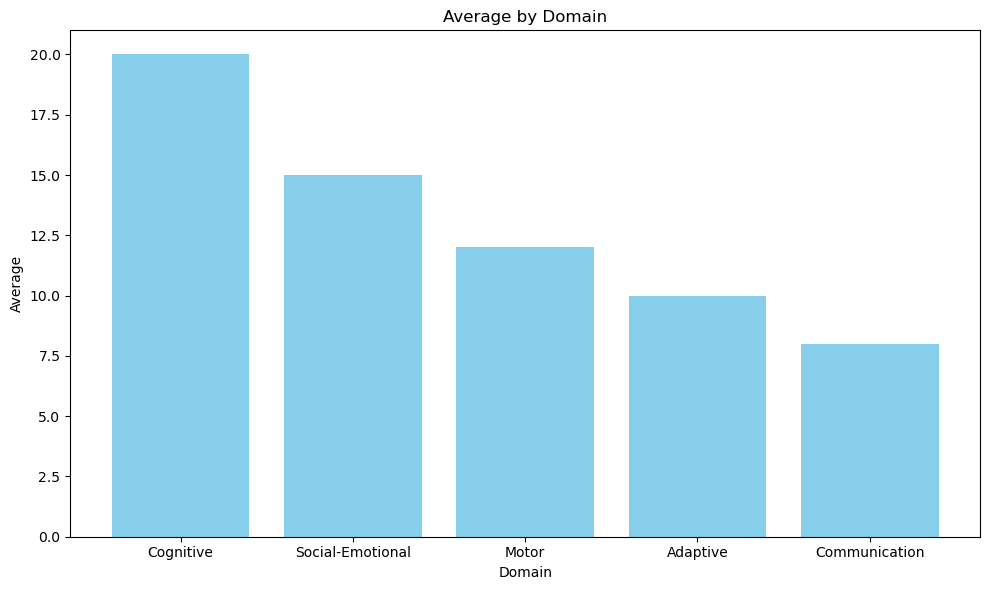

In [28]:
plt.figure(figsize=(10, 6))
plt.bar(averages_df['Domain'], averages_df['Average'], color='skyblue')
plt.xlabel('Domain')
plt.ylabel('Average')
plt.title('Average by Domain')
plt.xticks(rotation=360)
plt.tight_layout()

plt.show()

In [232]:
adaptive_domain = pd.read_csv('../data/adaptive_domain.csv')

numeric_columns = adaptive_domain.select_dtypes(include=['number'])
column_averages = numeric_columns.mean()

for column_name, average_value in column_averages.items():
    print(f"Average of {column_name}: {average_value}")



Average of Unnamed: 0: 11973.0
Average of Adaptive_Sum_of_Scaled_Scores: 11.728267680354234
Average of Adaptive_Developmental_Quotient: 86.98830360499603
Average of Adaptive_T-Score: 41.32620410209282
Average of Social-Emotional_Sum_of_Scaled_Scores: 22.773770217745643
Average of Social-Emotional_Developmental_Quotient: 94.2936013708363
Average of Social-Emotional_T-Score: 46.19747565511765
Average of Communication_Sum_of_Scaled_Scores: 13.020240883238541
Average of Communication_Developmental_Quotient: 79.06072264971563
Average of Communication_T-Score: 36.040481766477086
Average of Motor_Sum_of_Scaled_Scores: 22.871654399464703
Average of Motor_Developmental_Quotient: 93.87571094011375
Average of Cognitive_Sum_of_Scaled_Scores: 20.360779068795452
Average of Cognitive_Developmental_Quotient: 88.41218757836663
Average of BDI-3_Total_Sum_of_Scaled_Scores: 90.74614740368509
Average of BDI-3_Total_Developmental_Quotient: 87.21633165829145
Average of BDI-3_Total_T-Score: 41.64362105263158


C:\Users\iliss\AppData\Local\Temp\ipykernel_4044\4278800513.py:1: DtypeWarning: Columns (39) have mixed types. Specify dtype option on import or set low_memory=False.
  adaptive_domain = pd.read_csv('../data/adaptive_domain.csv')


In [233]:
grouped_averages_df

,Adaptive_Average,Social_Average,Communication_Average,Motor_Average,Cognitive_Average
0,80.571429,124.363636,97.090909,94.272727,109.400000
1,112.454545,129.533333,115.363636,124.600000,127.071429
2,97.428571,115.272727,104.000000,120.636364,112.300000
3,104.000000,115.545455,98.454545,99.727273,119.400000
4,82.142857,101.636364,91.818182,94.909091,115.400000
...,...,...,...,...,...
23942,84.285714,110.000000,98.363636,91.909091,104.200000
23943,126.909091,136.266667,126.272727,135.533333,140.285714
23944,119.818182,128.133333,90.454545,126.133333,127.357143
23945,117.636364,125.600000,113.818182,134.533333,130.071429


In [235]:
columns_to_remove = ['Code 1', 'Code 2', 'Code 3', 'Code 4', 'Code 5', 'Code 6', 'Code 7', 'Code 8', 'Code 9', 'Code 10']
data_cleaned = data_fixed.drop(columns=columns_to_remove)

data_cleaned.head()

,Child ID,Gender,Date of Birth,Location - Sub Level 1,Program Label,Adaptive Sum of Scaled Scores,Adaptive Developmental Quotient,Adaptive Percentile Rank,Adaptive 95% Confidence Interval,Adaptive RDI,...,Cognitive-Perception and Concepts RS,Cognitive-Perception and Concepts SS,Cognitive-Perception and Concepts PR,Cognitive-Perception and Concepts AE,Cognitive-Perception and Concepts RDI,Cognitive-Perception and Concepts CSS,Cognitive-Perception and Concepts CSS 90%,Cognitive-Perception and Concepts Z-Score,Cognitive-Perception and Concepts T-Score,Cognitive-Perception and Concepts NCE
0,44879,F,9/27/2022,Southwest,BDI-3 Eligibility Evaluation,7.0,85.0,16,77-97,39/90,...,9.0,13.0,84,12,98/90,411.0,392 - 431,1.0,60.0,71
1,47795,F,12/23/2020,Greater Nashville,BDI-3 Eligibility Evaluation,16.0,88.0,21,82-96,79/90,...,11.0,7.0,16,18,29/90,437.0,421 - 453,-1.0,40.0,29
2,54340,M,6/22/2021,First Tennessee,BDI-3 Eligibility Evaluation,8.0,90.0,25,81-101,77/90,...,10.0,7.0,16,15,37/90,426.0,408 - 444,-1.0,40.0,29
3,54344,F,3/7/2022,Southeast Tennessee,BDI-3 Eligibility Evaluation,13.0,115.0,84,103-123,99/90,...,9.0,10.0,50,12,92/90,411.0,392 - 431,0.0,50.0,50
4,54515,M,11/4/2021,Memphis Delta,BDI-3 Eligibility Evaluation,5.0,75.0,5,68-88,33117,...,10.0,10.0,50,15,88/90,426.0,408 - 444,0.0,50.0,50


In [236]:
data_cleaned = data_fixed.drop(columns=columns_to_remove)



In [237]:
data_cleaned

,Child ID,Gender,Date of Birth,Location - Sub Level 1,Program Label,Adaptive Sum of Scaled Scores,Adaptive Developmental Quotient,Adaptive Percentile Rank,Adaptive 95% Confidence Interval,Adaptive RDI,...,Cognitive-Perception and Concepts RS,Cognitive-Perception and Concepts SS,Cognitive-Perception and Concepts PR,Cognitive-Perception and Concepts AE,Cognitive-Perception and Concepts RDI,Cognitive-Perception and Concepts CSS,Cognitive-Perception and Concepts CSS 90%,Cognitive-Perception and Concepts Z-Score,Cognitive-Perception and Concepts T-Score,Cognitive-Perception and Concepts NCE
0,44879,F,9/27/2022,Southwest,BDI-3 Eligibility Evaluation,7.0,85.0,16,77-97,39/90,...,9.0,13.0,84,12,98/90,411.0,392 - 431,1.0,60.0,71
1,47795,F,12/23/2020,Greater Nashville,BDI-3 Eligibility Evaluation,16.0,88.0,21,82-96,79/90,...,11.0,7.0,16,18,29/90,437.0,421 - 453,-1.0,40.0,29
2,54340,M,6/22/2021,First Tennessee,BDI-3 Eligibility Evaluation,8.0,90.0,25,81-101,77/90,...,10.0,7.0,16,15,37/90,426.0,408 - 444,-1.0,40.0,29
3,54344,F,3/7/2022,Southeast Tennessee,BDI-3 Eligibility Evaluation,13.0,115.0,84,103-123,99/90,...,9.0,10.0,50,12,92/90,411.0,392 - 431,0.0,50.0,50
4,54515,M,11/4/2021,Memphis Delta,BDI-3 Eligibility Evaluation,5.0,75.0,5,68-88,33117,...,10.0,10.0,50,15,88/90,426.0,408 - 444,0.0,50.0,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19495,SP03287,F,9/25/2023,Memphis Delta,BDI-3 Eligibility Evaluation,13.0,115.0,84,103-123,99/90,...,6.0,15.0,95,6,>99/90,378.0,365 - 391,2.0,67.0,85
19496,SP03288,F,5/18/2021,South Central,BDI-3 Eligibility Evaluation,25.0,115.0,84,107-121,96/90,...,20.0,14.0,91,37,99/90,499.0,491 - 508,1.0,63.0,78
19497,SP03289,F,10/31/2021,South Central,BDI-3 Eligibility Evaluation,21.0,103.0,58,96-110,92/90,...,13.0,10.0,50,25,89/90,464.0,450 - 479,0.0,50.0,50
19498,SP03290,M,3/25/2020,Memphis Delta,BDI-3 Annual Evaluation,16.0,88.0,21,82-96,66/90,...,23.0,9.0,37,40,75/90,507.0,500 - 515,0.0,47.0,43


In [238]:
data_cleaned_new = data_fixed.drop(columns=columns_to_remove)

,Child ID,Gender,Date of Birth,Location - Sub Level 1,Program Label,Adaptive Sum of Scaled Scores,Adaptive Developmental Quotient,Adaptive Percentile Rank,Adaptive 95% Confidence Interval,Adaptive RDI,...,Cognitive-Perception and Concepts RS,Cognitive-Perception and Concepts SS,Cognitive-Perception and Concepts PR,Cognitive-Perception and Concepts AE,Cognitive-Perception and Concepts RDI,Cognitive-Perception and Concepts CSS,Cognitive-Perception and Concepts CSS 90%,Cognitive-Perception and Concepts Z-Score,Cognitive-Perception and Concepts T-Score,Cognitive-Perception and Concepts NCE
0,44879,F,9/27/2022,Southwest,BDI-3 Eligibility Evaluation,7.0,85.0,16,77-97,39/90,...,9.0,13.0,84,12,98/90,411.0,392 - 431,1.0,60.0,71
1,47795,F,12/23/2020,Greater Nashville,BDI-3 Eligibility Evaluation,16.0,88.0,21,82-96,79/90,...,11.0,7.0,16,18,29/90,437.0,421 - 453,-1.0,40.0,29
2,54340,M,6/22/2021,First Tennessee,BDI-3 Eligibility Evaluation,8.0,90.0,25,81-101,77/90,...,10.0,7.0,16,15,37/90,426.0,408 - 444,-1.0,40.0,29
3,54344,F,3/7/2022,Southeast Tennessee,BDI-3 Eligibility Evaluation,13.0,115.0,84,103-123,99/90,...,9.0,10.0,50,12,92/90,411.0,392 - 431,0.0,50.0,50
4,54515,M,11/4/2021,Memphis Delta,BDI-3 Eligibility Evaluation,5.0,75.0,5,68-88,33117,...,10.0,10.0,50,15,88/90,426.0,408 - 444,0.0,50.0,50


In [239]:
data_cleaned_new['Date of Birth'] = pd.to_datetime(data_cleaned_new['Date of Birth'])
data_cleaned_new = pd.to_datetime(data_cleaned_new['Date of Birth'])

In [240]:
data_cleaned_new = data_fixed.drop(columns=columns_to_remove)
data_cleaned_new.head()

,Child ID,Gender,Date of Birth,Location - Sub Level 1,Program Label,Adaptive Sum of Scaled Scores,Adaptive Developmental Quotient,Adaptive Percentile Rank,Adaptive 95% Confidence Interval,Adaptive RDI,...,Cognitive-Perception and Concepts RS,Cognitive-Perception and Concepts SS,Cognitive-Perception and Concepts PR,Cognitive-Perception and Concepts AE,Cognitive-Perception and Concepts RDI,Cognitive-Perception and Concepts CSS,Cognitive-Perception and Concepts CSS 90%,Cognitive-Perception and Concepts Z-Score,Cognitive-Perception and Concepts T-Score,Cognitive-Perception and Concepts NCE
0,44879,F,9/27/2022,Southwest,BDI-3 Eligibility Evaluation,7.0,85.0,16,77-97,39/90,...,9.0,13.0,84,12,98/90,411.0,392 - 431,1.0,60.0,71
1,47795,F,12/23/2020,Greater Nashville,BDI-3 Eligibility Evaluation,16.0,88.0,21,82-96,79/90,...,11.0,7.0,16,18,29/90,437.0,421 - 453,-1.0,40.0,29
2,54340,M,6/22/2021,First Tennessee,BDI-3 Eligibility Evaluation,8.0,90.0,25,81-101,77/90,...,10.0,7.0,16,15,37/90,426.0,408 - 444,-1.0,40.0,29
3,54344,F,3/7/2022,Southeast Tennessee,BDI-3 Eligibility Evaluation,13.0,115.0,84,103-123,99/90,...,9.0,10.0,50,12,92/90,411.0,392 - 431,0.0,50.0,50
4,54515,M,11/4/2021,Memphis Delta,BDI-3 Eligibility Evaluation,5.0,75.0,5,68-88,33117,...,10.0,10.0,50,15,88/90,426.0,408 - 444,0.0,50.0,50


In [241]:
updatedfile = '../data/all_evals_cleaned_new.csv'


data_cleaned_new.to_csv(updatedfile, index=False)

new_cleaned_file_path

'../data/all_evals_cleaned_new.csv'

In [243]:
import re

def is_date(string):
    if string:
        return bool(re.search(r'\d{1,2}/\d{1,2}/\d{2,4}', string))
    return False

date_columns = {}
for col in data_cleaned_new.columns:
    if data_cleaned_new[col].dtype == 'object':
       
        if any(data_cleaned_new[col].apply(lambda x: is_date(str(x)))):
            date_columns[col] = data_cleaned_new[col].apply(lambda x: is_date(str(x))).sum()

date_columns  


{'Date of Birth': 19500}

In [246]:
data_cleaned = data.drop_duplicates()
sp_ids = data_cleaned['Child ID'].str.startswith('SP', na=False).sum()
total_rows = data_cleaned.shape[0]
rdi_sample = data_cleaned['Adaptive RDI'].head(10)
data_cleaned.shape, sp_ids, total_rows, rdi_sample



((19500, 217),
 3291,
 19500,
 0    39/90
 1    79/90
 2    77/90
 3    99/90
 4    33117
 5    79/90
 6    71/90
 7    96/90
 8    21/90
 9    91/90
 Name: Adaptive RDI, dtype: object)

In [247]:
incorrect_rdi_mask = ~data_cleaned['Adaptive RDI'].str.contains('/', na=False)
incorrect_rdi_examples = data_cleaned[incorrect_rdi_mask]['Adaptive RDI'].unique()
incorrect_rdi_examples[:10]

array(['33117', '32874', '33147', '33208', '32964', '32994', '32933',
       '33086', '32905', '33055'], dtype=object)

In [248]:
incorrect_rdi_count = incorrect_rdi_mask.sum()
incorrect_rdi_percentage = (incorrect_rdi_count / total_rows) * 100
incorrect_rdi_count, incorrect_rdi_percentage


(2010, 10.307692307692308)

In [249]:
data_cleaned.loc[incorrect_rdi_mask, 'Adaptive RDI'] = pd.NA

data_cleaned['Adaptive RDI'].head(10)

0    39/90
1    79/90
2    77/90
3    99/90
4     <NA>
5    79/90
6    71/90
7    96/90
8    21/90
9    91/90
Name: Adaptive RDI, dtype: object

In [250]:
selected_columns = ['Adaptive Sum of Scaled Scores', 'Adaptive Developmental Quotient', 
                    'Adaptive Percentile Rank', 'Personal-Social Sum of Scaled Scores', 
                    'Personal-Social Developmental Quotient', 'Personal-Social Percentile Rank']


In [159]:
all_columns = data_cleaned.columns.tolist()
all_columns[:30]

['Child ID',
 'Gender',
 'Date of Birth',
 'Location - Sub Level 1',
 'Program Label',
 'Adaptive Sum of Scaled Scores',
 'Adaptive Developmental Quotient',
 'Adaptive Percentile Rank',
 'Adaptive 95% Confidence Interval',
 'Adaptive RDI',
 'Adaptive Z-Score',
 'Adaptive NCE',
 'Social-Emotional Sum of Scaled Scores',
 'Social-Emotional Developmental Quotient',
 'Social-Emotional Percentile Rank',
 'Social-Emotional 95% Confidence Interval',
 'Social-Emotional RDI',
 'Social-Emotional Z-Score',
 'Social-Emotional NCE',
 'Communication Sum of Scaled Scores',
 'Communication Developmental Quotient',
 'Communication Percentile Rank',
 'Communication 95% Confidence Interval',
 'Communication RDI',
 'Communication Z-Score',
 'Communication T-Score',
 'Communication NCE',
 'Motor Sum of Scaled Scores',
 'Motor Developmental Quotient',
 'Motor Percentile Rank']

In [251]:
selected_domain_columns = [
    'Adaptive Sum of Scaled Scores', 'Adaptive Developmental Quotient', 'Adaptive Percentile Rank',
    'Social-Emotional Sum of Scaled Scores', 'Social-Emotional Developmental Quotient', 'Social-Emotional Percentile Rank',
    'Communication Sum of Scaled Scores', 'Communication Developmental Quotient', 'Communication Percentile Rank',
    'Motor Sum of Scaled Scores', 'Motor Developmental Quotient', 'Motor Percentile Rank']

descriptive_stats_domains = data_cleaned[selected_domain_columns].describe()

descriptive_stats_domains

,Adaptive Sum of Scaled Scores,Adaptive Developmental Quotient,Social-Emotional Sum of Scaled Scores,Social-Emotional Developmental Quotient,Communication Sum of Scaled Scores,Communication Developmental Quotient,Motor Sum of Scaled Scores,Motor Developmental Quotient
count,19493.000000,19493.000000,19483.000000,19483.000000,19469.0000,19469.000000,19471.000000,19471.000000
mean,11.412712,87.435079,22.381153,94.470051,13.2015,79.604499,22.655334,94.511222
std,5.822943,17.438731,7.519204,16.695712,6.7228,20.168400,8.067995,17.288802
min,1.000000,46.000000,2.000000,46.000000,2.0000,46.000000,2.000000,42.000000
25%,7.000000,76.000000,17.000000,84.000000,8.0000,64.000000,17.000000,85.000000
50%,11.000000,88.000000,22.000000,96.000000,13.0000,79.000000,22.000000,96.000000
75%,15.000000,100.000000,28.000000,106.000000,18.0000,94.000000,28.000000,106.000000
max,36.000000,148.000000,53.000000,154.000000,38.0000,154.000000,50.000000,154.000000


In [252]:
assessment_counts = data_cleaned['Child ID'].value_counts()


In [253]:
children_with_multiple_assessments = assessment_counts[assessment_counts > 1].index


In [254]:
data_multiple_assessments = data_cleaned[data_cleaned['Child ID'].isin(children_with_multiple_assessments)]

In [255]:
score_columns_for_correlation = [
    'Adaptive Sum of Scaled Scores', 'Social-Emotional Sum of Scaled Scores', 
    'Communication Sum of Scaled Scores', 'Motor Sum of Scaled Scores'
]

In [256]:
correlation_matrix_scores = data_cleaned[score_columns_for_correlation].corr()


In [257]:
data_cleaned['Gender_numeric'] = data_cleaned['Gender'].astype('category').cat.codes
data_cleaned['Location_numeric'] = data_cleaned['Location - Sub Level 1'].astype('category').cat.codes


In [180]:
columns_for_correlation_with_demographics = score_columns_for_correlation + ['Gender_numeric', 'Location_numeric']

correlation_matrix_with_demographics = data_cleaned[columns_for_correlation_with_demographics].corr()

correlation_matrix_scores, correlation_matrix_with_demographics


(                                       Adaptive Sum of Scaled Scores  \
 Adaptive Sum of Scaled Scores                               1.000000   
 Social-Emotional Sum of Scaled Scores                       0.713947   
 Communication Sum of Scaled Scores                          0.234833   
 Motor Sum of Scaled Scores                                  0.702647   
 
                                        Social-Emotional Sum of Scaled Scores  \
 Adaptive Sum of Scaled Scores                                       0.713947   
 Social-Emotional Sum of Scaled Scores                               1.000000   
 Communication Sum of Scaled Scores                                  0.406939   
 Motor Sum of Scaled Scores                                          0.635089   
 
                                        Communication Sum of Scaled Scores  \
 Adaptive Sum of Scaled Scores                                    0.234833   
 Social-Emotional Sum of Scaled Scores                            0.40

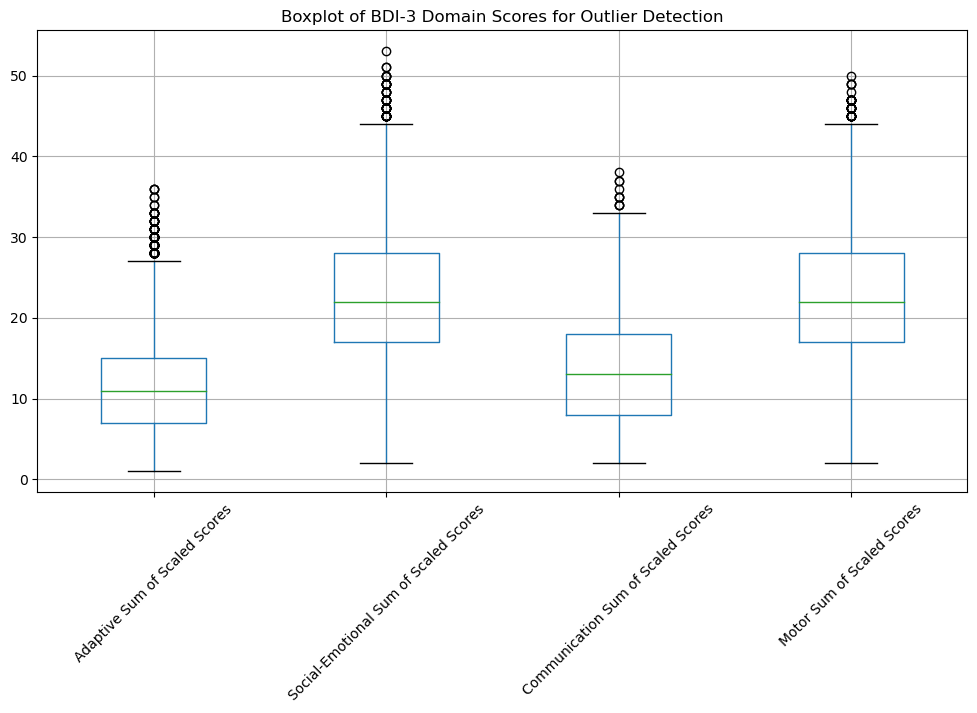

In [258]:
# Identifying Anomalies/Outliers: Focusing on key domains

def plot_outliers(data, columns, title):
    plt.figure(figsize=(12, 6))
    data.boxplot(column=columns)
    plt.title(title)
    plt.xticks(rotation=45)
    plt.show()

plot_outliers(data_cleaned, score_columns_for_correlation, "Boxplot of BDI-3 Domain Scores for Outlier Detection")




In [260]:
score_columns_for_gender_analysis = [
    'Adaptive Sum of Scaled Scores', 'Social-Emotional Sum of Scaled Scores', 
    'Communication Sum of Scaled Scores', 'Motor Sum of Scaled Scores']

gender_analysis = data_cleaned.groupby('Gender')[score_columns_for_gender_analysis].mean()

gender_analysis

,Adaptive Sum of Scaled Scores,Social-Emotional Sum of Scaled Scores,Communication Sum of Scaled Scores,Motor Sum of Scaled Scores
Gender,,,,
F,11.469289,22.669383,14.273984,22.442140
M,11.352685,22.211416,12.511599,22.726306
U,12.459184,22.180272,14.833333,25.017007


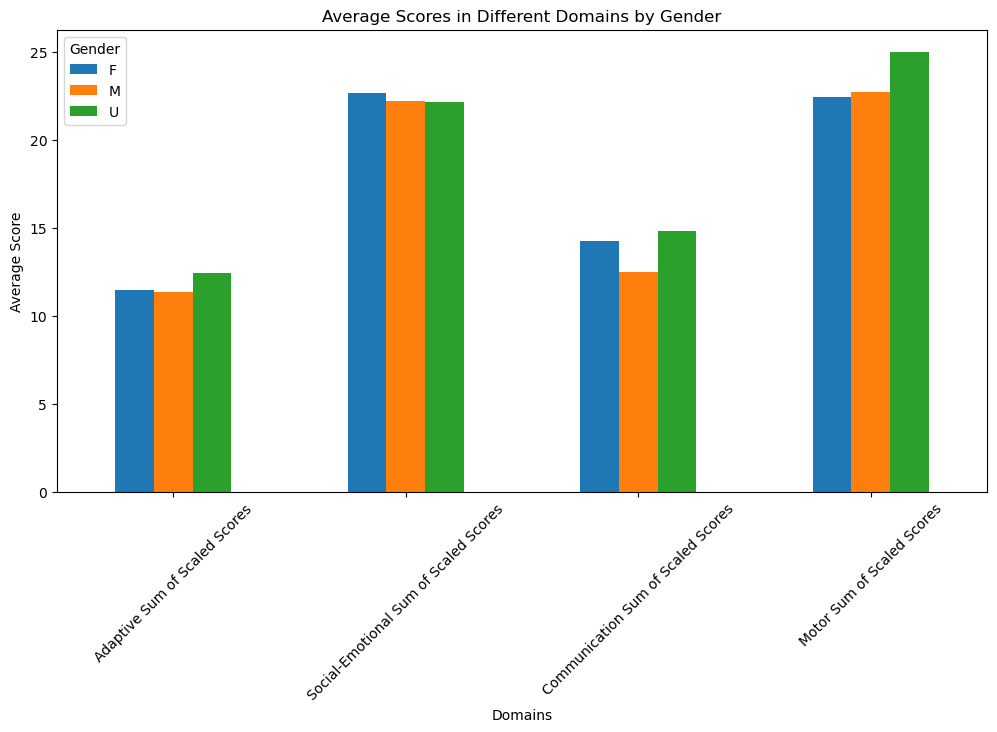

In [188]:

gender_analysis_transposed = gender_analysis.transpose()


ax = gender_analysis_transposed.plot(kind='bar', figsize=(12, 6), rot=0)
ax.set_title('Average Scores in Different Domains by Gender')
ax.set_ylabel('Average Score')
ax.set_xlabel('Domains')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.show()


In [191]:
print(averages_df)

             Domain  Average
4         Cognitive       20
1  Social-Emotional       15
3             Motor       12
0          Adaptive       10
2     Communication        8


In [262]:
average_scores_by_domain_sorted = average_scores_by_domain.sort_values(by='Average Score', ascending=True)

average_scores_by_domain_sorted



,Domain,Average Score
0,Adaptive Sum of Scaled Scores,11.412712
2,Communication Sum of Scaled Scores,13.201500
1,Social-Emotional Sum of Scaled Scores,22.381153
3,Motor Sum of Scaled Scores,22.655334


In [263]:
np.random.seed(0)
sample_children_ids = np.random.choice(data_multiple_assessments['Child ID'].unique(), size=10, replace=False)


In [264]:
sample_children_data = data_multiple_assessments[data_multiple_assessments['Child ID'].isin(sample_children_ids)]
score_domains = ['Adaptive Sum of Scaled Scores', 'Social-Emotional Sum of Scaled Scores', 
                 'Communication Sum of Scaled Scores', 'Motor Sum of Scaled Scores']
sample_children_scores = sample_children_data[['Child ID'] + score_domains]


In [265]:
pivot_sample_scores = sample_children_scores.pivot_table(index='Child ID', values=score_domains)


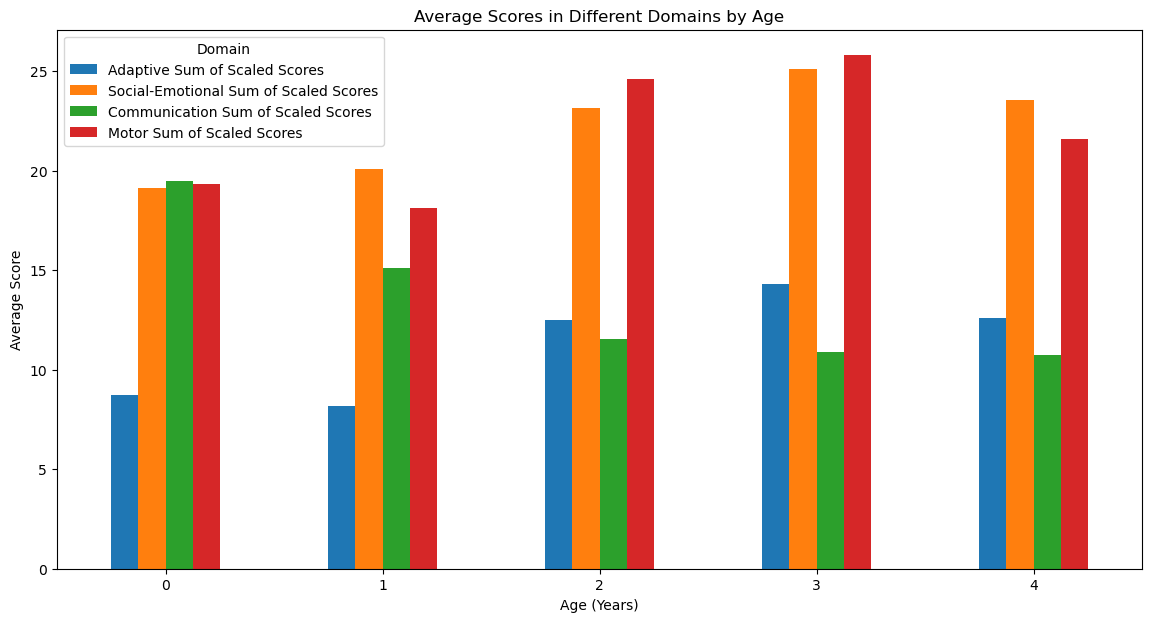

In [266]:
if 'reference_date' not in locals():
    reference_date = datetime.now()

if data_cleaned['Date of Birth'].dtype != 'datetime64[ns]':
    data_cleaned['Date of Birth'] = pd.to_datetime(data_cleaned['Date of Birth'], errors='coerce')

data_cleaned['Age'] = data_cleaned['Date of Birth'].apply(lambda dob: (reference_date - dob).days // 365 if pd.notnull(dob) else None)

age_group_analysis = data_cleaned.groupby('Age')[score_columns_for_correlation].mean()

# Creating the bar chart again
ax = age_group_analysis.plot(kind='bar', figsize=(14, 7))
ax.set_title('Average Scores in Different Domains by Age')
ax.set_ylabel('Average Score')
ax.set_xlabel('Age (Years)')
plt.xticks(rotation=0)
plt.legend(title='Domain')
plt.show()


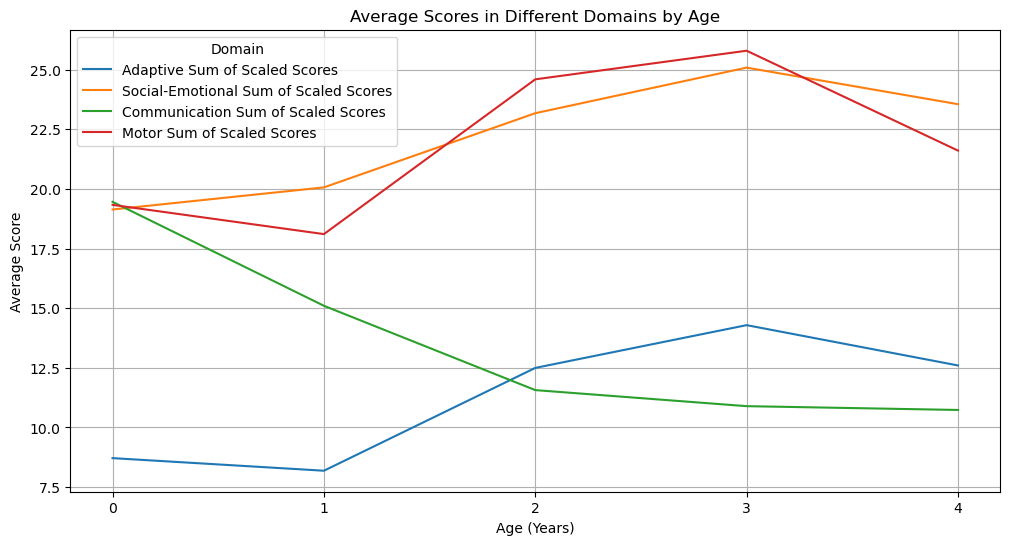

In [267]:
ax = age_group_analysis.plot(figsize=(12, 6))
ax.set_title('Average Scores in Different Domains by Age')
ax.set_ylabel('Average Score')
ax.set_xlabel('Age (Years)')
plt.xticks(age_group_analysis.index)
plt.legend(title='Domain')
plt.grid(True)
plt.show()


In [ ]:
# 6. Is there any difference in scoring noted based on evaluation type?
# Using new cleaned data from Aarons team.

In [280]:
teis = pd.read_csv('../data/teis.csv', dtype = {"Child ID" : object, "Cognitive T-Score" : object})

In [290]:
# compare the scores based on the type of evaluation: 
# Eligibility Evaluation, Annual Evaluation, and Milestone or Exit Evaluation.

eligibility_eval = teis[teis['Program Label'] == 'BDI-3 Eligibility Evaluation']
annual_eval = teis[teis['Program Label'] == 'BDI-3 Annual Evaluation']
milestone_exit_eval = teis[teis['Program Label'] == 'BDI-3 Milestone or Exit Evaluation']



In [291]:
numeric_score_columns = [col for col in score_columns if pd.api.types.is_numeric_dtype(teis[col])]

In [288]:
mean_eligibility_numeric = eligibility_eval[numeric_score_columns].mean()
mean_annual_numeric = annual_eval[numeric_score_columns].mean()
mean_milestone_exit_numeric = milestone_exit_eval[numeric_score_columns].mean()

mean_scores_comparison_numeric = pd.DataFrame({
    'Eligibility Evaluation': mean_eligibility_numeric,
    'Annual Evaluation': mean_annual_numeric,
    'Milestone/Exit Evaluation': mean_milestone_exit_numeric
})

mean_scores_comparison_numeric

,Eligibility Evaluation,Annual Evaluation,Milestone/Exit Evaluation
Adaptive Sum of Scaled Scores,10.574600,12.807503,15.113300
Adaptive Developmental Quotient,89.183029,84.352984,85.605911
Adaptive Percentile Rank,31.993057,26.191918,28.320197
Adaptive T-Score,42.790651,39.568511,40.403941
Social-Emotional Sum of Scaled Scores,21.370236,24.077001,26.443350
Social-Emotional Developmental Quotient,95.430313,92.786978,93.064039
Social-Emotional Percentile Rank,42.265019,37.801914,38.394089
Social-Emotional T-Score,46.953892,45.193445,45.384236
Communication Sum of Scaled Scores,13.726700,12.305004,11.645320
Communication Developmental Quotient,81.180099,76.915011,74.935961


In [ ]:
# Eligibility Evaluation often shows higher Developmental Quotients and Percentile Ranks, 
# while the subsequent Annual and Milestone/Exit Evaluations show higher Scaled Scores, particularly 
# in the Social-Emotional domain.

In [292]:
# overall average scores for each evaluation type

overall_mean_eligibility = eligibility_eval[numeric_score_columns].mean().mean()
overall_mean_annual = annual_eval[numeric_score_columns].mean().mean()
overall_mean_milestone_exit = milestone_exit_eval[numeric_score_columns].mean().mean()

overall_mean_scores = {
    'Overall Average - Eligibility Evaluation': overall_mean_eligibility,
    'Overall Average - Annual Evaluation': overall_mean_annual,
    'Overall Average - Milestone/Exit Evaluation': overall_mean_milestone_exit
}

overall_mean_scores


{'Overall Average - Eligibility Evaluation': 47.868304050617475,
 'Overall Average - Annual Evaluation': 45.5300527293131,
 'Overall Average - Milestone/Exit Evaluation': 46.375600883068856}